# `NLP`

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df = df.iloc[:3000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(3000, 2)

In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Process in NLP project

1. data collecting

2. data cleaning
    - lowercasing
    - removing leading and trailing spaces
    - removing html tags
    - removing urls
    - expanding abbreviations
    - spelling correction
    - punctuations
    - remove special characters(@, #, %, etc...)


3. data preprocessing
    - tokenization
        - It is the process of breaking a sentence into tokens which are easier to deal with.
    - stop word removal
        - stop words are words which do not have any semantic value and are just there to help form the sentence. Examples are I, have, and, or, could, should, etc...
    - Stemming
        - It is the process of converting a word into it's base form. For example: dancing, danced, danced are all converted to dance.
        


4. EDA(Exploratory Data Analysis)

5. Make Features

6. Vectorization := Machine Learning Models work on numbers. So we need to convert our textual data into numbers. For this we have 3 methods:
    - Bag Of Words (BOW)
    - TFIDF
    - Word2Vec
    
    
7. Modelling
8. Evaluation
9. Deploying
10. Monitoring

# Data Cleaning

## `Drop duplicate rows`

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

## `lowercasing`

In [8]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## `removing leading and trailing spaces`

In [9]:
df['review'] = df['review'].str.strip(' ')
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## `removing html tags`

In [10]:
import re # regular expression
def remove_html(text):
    text = re.sub(r'<.*?>', '', text)
    return text

In [11]:
remove_html('<h1>Heading</h1><br/>My name is Abhishek Jha')

'HeadingMy name is Abhishek Jha'

In [12]:
df['review'] = df['review'].apply(remove_html)

In [13]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### `This is one way of removing html elements but this is not optimal as we have passed a function which is not vectorized.`
#### `Thus we may use the vectorized pandas replace() method.`

In [14]:
df['review'].str.replace(r'<.*?>', '', regex = True)
# It is mandatory that we pass regex = True as in previous versions of pandas it was set to True by default.

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. the filming tec...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
2995    to experience head you really need to understa...
2996    i'm a fan of judy garland, vincente minnelli, ...
2997    "mr. harvey lights a candle" is anchored by a ...
2998    della myers (kim basinger) is an upper-class h...
2999    i hired this movie expecting a few laughs, hop...
Name: review, Length: 3000, dtype: object

In [15]:
df['review'] = df['review'].str.replace(r'<.*?>', '', regex = True)

In [16]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## `removing urls`

In [17]:
def remove_url(text):
    text=re.sub(r"https?://\S+|www\.\S+",'',text)
    return text

In [18]:
remove_url('My name is Abhishek Jha and My website is www.google.com.')

'My name is Abhishek Jha and My website is '

In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### `Find all the reviews which contain a url`

In [20]:
mask = df['review'].str.contains(r"https?://\S+|www\.\S+", regex = True)
reviews_with_url = df[mask]
reviews_with_url

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1088,this quasi j-horror film followed a young woma...,negative
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
1972,the basic plot of 'marigold' boasts of a roman...,negative
2132,"i, too, found ""oppenheimer"" to be a brilliant ...",positive


In [21]:
reviews_with_url['review'].iloc[2] # at position 1088 in original dataframe

"this quasi j-horror film followed a young woman as she returns to her childhood village on the island of shikoku to sell the family house and meet up with old friends. she finds that one, the daughter of the village priestess, drowned several years earlier. she and fumiko (another childhood friend) then learn that sayori's mother is trying to bring her back to life with black magic. already the bonds between the dead and living are getting weak and the friends and villagers are seeing ghosts. nothing was exceptional or even very good about this movie. unlike stellar j-horror films, the suspense doesn't really build, the result doesn't seem overly threatening and the ending borders on the absurd.this movie is like plain white rice cooked a little too long so that it is bordering on mushy. sometimes you get this at poor asian restaurants or cook your own white rice a little too long. you end up eating it, because you need it with the meal, because what is chinese or japanese food withou

#### `We need to remove url from all these reviews`

In [22]:
df['review'] = df['review'].apply(remove_url)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### `Now let us check if we still have urls in reviews or not`

In [23]:
mask = df['review'].str.contains(r"https?://\S+|www\.\S+", regex = True)
reviews_with_url = df[mask]
reviews_with_url

,review,sentiment


## `Approach 2 of removing urls`

In [24]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+", '', regex = True)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## `Expanding Abbreviations`

In [25]:
def expand_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [26]:
expand_abb("I'll join on Monday. y'all need not worry.")

'I will join on Monday. you all need not worry.'

In [27]:
df['review'] = df['review'].apply(expand_abb)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## `correcting spelling mistakes`

In [28]:
from textblob import TextBlob

In [29]:
text = 'I lik to driv at nigt. It is veri gud'
TextBlob(text).correct().string

'I like to drive at night. It is very god'

In [30]:
def spelling_corrector(text):
    return TextBlob(text).correct().string

In [31]:
try:
    df['review'] = df['review'].apply(spelling_corrector)
except KeyboardInterrupt as ex:
    print('The process was interrupted by key interrupt in between as the process is taking very long.')

In [32]:
df

,review,sentiment
0,one of the other reviews has mentioned that af...,positive
1,a wonderful little production. the filling tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"letter matter's ""love in the time of money"" is...",positive
...,...,...
2995,to experience head you really need to understa...,positive
2996,"I am a fan of judy grand, vincent minnelli, an...",negative
2997,"""mr. harvey lights a candle"" is anchor by a br...",positive
2998,well eyes (him singer) is an upper-class house...,negative


## `removing punctuation marks`

In [33]:
import string

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def remove_punctuation(text):
    for punctuation_mark in string.punctuation:
        if punctuation_mark in text:
            text = text.replace(punctuation_mark, '')
    return text

In [36]:
remove_punctuation("$%&Abhishek\'Jha()*@[\\]^is a very good boy")

'AbhishekJhais a very good boy'

In [37]:
df['review'] = df['review'].apply(remove_punctuation)
df

,review,sentiment
0,one of the other reviews has mentioned that af...,positive
1,a wonderful little production the filling tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,letter matters love in the time of money is a ...,positive
...,...,...
2995,to experience head you really need to understa...,positive
2996,I am a fan of judy grand vincent minnelli and ...,negative
2997,mr harvey lights a candle is anchor by a brill...,positive
2998,well eyes him singer is an upperclass housewif...,negative


# `preprocessing`

    Preprocessing is the process of converting data into a form which can be easily used by a machine learning model. ML models work on numbers
    so it is necessary that we convert our data into machine learning model comfortable data form.
    
    
`Tokenization`

`stop words removal`

### `Tokenization`

In [38]:
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [39]:
df['review'].apply(word_tokenize)

0       [one, of, the, other, reviews, has, mentioned,...
1       [a, wonderful, little, production, the, fillin...
2       [i, thought, this, was, a, wonderful, way, to,...
3       [basically, there, is, a, family, where, a, li...
4       [letter, matters, love, in, the, time, of, mon...
                              ...                        
2995    [to, experience, head, you, really, need, to, ...
2996    [I, am, a, fan, of, judy, grand, vincent, minn...
2997    [mr, harvey, lights, a, candle, is, anchor, by...
2998    [well, eyes, him, singer, is, an, upperclass, ...
2999    [i, hired, this, movie, expecting, a, few, lau...
Name: review, Length: 3000, dtype: object

In [40]:
df['tokenized_review'] = df['review'].apply(word_tokenize)
df

,review,sentiment,tokenized_review
0,one of the other reviews has mentioned that af...,positive,"[one, of, the, other, reviews, has, mentioned,..."
1,a wonderful little production the filling tech...,positive,"[a, wonderful, little, production, the, fillin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,letter matters love in the time of money is a ...,positive,"[letter, matters, love, in, the, time, of, mon..."
...,...,...,...
2995,to experience head you really need to understa...,positive,"[to, experience, head, you, really, need, to, ..."
2996,I am a fan of judy grand vincent minnelli and ...,negative,"[I, am, a, fan, of, judy, grand, vincent, minn..."
2997,mr harvey lights a candle is anchor by a brill...,positive,"[mr, harvey, lights, a, candle, is, anchor, by..."
2998,well eyes him singer is an upperclass housewif...,negative,"[well, eyes, him, singer, is, an, upperclass, ..."


### `removing stopwords`

In [41]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
len(stopwords.words('english'))

179

In [44]:
def remove_stopwords(str_list):
    words = stopwords.words('english')
    
    l = []
    
    for word in str_list:
        if word not in words:
            l.append(word)
            
    return l

In [45]:
remove_stopwords(['i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'and', 'was', 'about', 'to', 'proceed'])

['thought', 'wonderful', 'way', 'proceed']

In [46]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)
df

,review,sentiment,tokenized_review
0,one of the other reviews has mentioned that af...,positive,"[one, reviews, mentioned, watching, 1, oz, epi..."
1,a wonderful little production the filling tech...,positive,"[wonderful, little, production, filling, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,letter matters love in the time of money is a ...,positive,"[letter, matters, love, time, money, usually, ..."
...,...,...,...
2995,to experience head you really need to understa...,positive,"[experience, head, really, need, understand, m..."
2996,I am a fan of judy grand vincent minnelli and ...,negative,"[I, fan, judy, grand, vincent, minnelli, gene,..."
2997,mr harvey lights a candle is anchor by a brill...,positive,"[mr, harvey, lights, candle, anchor, brilliant..."
2998,well eyes him singer is an upperclass housewif...,negative,"[well, eyes, singer, upperclass, housewife, li..."


#### `Now we need to join the tokenized reviews and then replace it with reviews.`

In [47]:
df['tokenized_review'].str.join(" ")

0       one reviews mentioned watching 1 oz episode ho...
1       wonderful little production filling technique ...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake thinks combin...
4       letter matters love time money usually stunnin...
                              ...                        
2995    experience head really need understand monkeys...
2996    I fan judy grand vincent minnelli gene belly m...
2997    mr harvey lights candle anchor brilliant perfo...
2998    well eyes singer upperclass housewife lives pr...
2999    hired movie expecting laughs hopefully enough ...
Name: tokenized_review, Length: 3000, dtype: object

In [48]:
df['review'] = df['tokenized_review'].str.join(" ")
df

,review,sentiment,tokenized_review
0,one reviews mentioned watching 1 oz episode ho...,positive,"[one, reviews, mentioned, watching, 1, oz, epi..."
1,wonderful little production filling technique ...,positive,"[wonderful, little, production, filling, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks combin...,negative,"[basically, family, little, boy, jake, thinks,..."
4,letter matters love time money usually stunnin...,positive,"[letter, matters, love, time, money, usually, ..."
...,...,...,...
2995,experience head really need understand monkeys...,positive,"[experience, head, really, need, understand, m..."
2996,I fan judy grand vincent minnelli gene belly m...,negative,"[I, fan, judy, grand, vincent, minnelli, gene,..."
2997,mr harvey lights candle anchor brilliant perfo...,positive,"[mr, harvey, lights, candle, anchor, brilliant..."
2998,well eyes singer upperclass housewife lives pr...,negative,"[well, eyes, singer, upperclass, housewife, li..."


## `EDA and making new features`

    Now we will make new features in our dataframe. This is called feature engineering.

##### `We can make a feature called as num_of_words. This can be related to the review. I mean generally negative reviews are lengthy 🙄`

In [49]:
df['num_of_words_in_review'] = df['tokenized_review'].apply(len)
df

,review,sentiment,tokenized_review,num_of_words_in_review
0,one reviews mentioned watching 1 oz episode ho...,positive,"[one, reviews, mentioned, watching, 1, oz, epi...",166
1,wonderful little production filling technique ...,positive,"[wonderful, little, production, filling, techn...",84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",87
3,basically family little boy jake thinks combin...,negative,"[basically, family, little, boy, jake, thinks,...",64
4,letter matters love time money usually stunnin...,positive,"[letter, matters, love, time, money, usually, ...",125
...,...,...,...,...
2995,experience head really need understand monkeys...,positive,"[experience, head, really, need, understand, m...",54
2996,I fan judy grand vincent minnelli gene belly m...,negative,"[I, fan, judy, grand, vincent, minnelli, gene,...",98
2997,mr harvey lights candle anchor brilliant perfo...,positive,"[mr, harvey, lights, candle, anchor, brilliant...",197
2998,well eyes singer upperclass housewife lives pr...,negative,"[well, eyes, singer, upperclass, housewife, li...",175


##### `We can also make a feature called as review_length which stores the length of review. This could also be a good feature. Although we shall decide later.`

In [50]:
df['review_length'] = df['review'].str.len()
df

,review,sentiment,tokenized_review,num_of_words_in_review,review_length
0,one reviews mentioned watching 1 oz episode ho...,positive,"[one, reviews, mentioned, watching, 1, oz, epi...",166,1135
1,wonderful little production filling technique ...,positive,"[wonderful, little, production, filling, techn...",84,649
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",87,586
3,basically family little boy jake thinks combin...,negative,"[basically, family, little, boy, jake, thinks,...",64,443
4,letter matters love time money usually stunnin...,positive,"[letter, matters, love, time, money, usually, ...",125,855
...,...,...,...,...,...
2995,experience head really need understand monkeys...,positive,"[experience, head, really, need, understand, m...",54,397
2996,I fan judy grand vincent minnelli gene belly m...,negative,"[I, fan, judy, grand, vincent, minnelli, gene,...",98,702
2997,mr harvey lights candle anchor brilliant perfo...,positive,"[mr, harvey, lights, candle, anchor, brilliant...",197,1452
2998,well eyes singer upperclass housewife lives pr...,negative,"[well, eyes, singer, upperclass, housewife, li...",175,1263


#### `Now plot the distplot of positive and negative reviews to see if they are the correct features.`

In [51]:
import seaborn as sns

In [52]:
positive = df[df['sentiment'] == 'positive']
positive

,review,sentiment,tokenized_review,num_of_words_in_review,review_length
0,one reviews mentioned watching 1 oz episode ho...,positive,"[one, reviews, mentioned, watching, 1, oz, epi...",166,1135
1,wonderful little production filling technique ...,positive,"[wonderful, little, production, filling, techn...",84,649
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",87,586
4,letter matters love time money usually stunnin...,positive,"[letter, matters, love, time, money, usually, ...",125,855
5,probably alltime favorite movie story helpless...,positive,"[probably, alltime, favorite, movie, story, he...",57,390
...,...,...,...,...,...
2987,dream quest surprisingly good movie noticeable...,positive,"[dream, quest, surprisingly, good, movie, noti...",36,247
2989,long time since saw mindseries happy say remem...,positive,"[long, time, since, saw, mindseries, happy, sa...",234,1749
2994,remember seeing late stayed charming loud colo...,positive,"[remember, seeing, late, stayed, charming, lou...",62,408
2995,experience head really need understand monkeys...,positive,"[experience, head, really, need, understand, m...",54,397


In [53]:
negative = df[df['sentiment'] == 'negative']
negative

,review,sentiment,tokenized_review,num_of_words_in_review,review_length
3,basically family little boy jake thinks combin...,negative,"[basically, family, little, boy, jake, thinks,...",64,443
7,show amazing fresh innovative idea 70s first t...,negative,"[show, amazing, fresh, innovative, idea, 70s, ...",82,550
8,encouraged positive comments film looking forw...,negative,"[encouraged, positive, comments, film, looking...",64,414
10,phil alien one quickly films humour based arou...,negative,"[phil, alien, one, quickly, films, humour, bas...",49,362
11,saw movie 12 came recall caries scene big bird...,negative,"[saw, movie, 12, came, recall, caries, scene, ...",83,550
...,...,...,...,...,...
2992,jealousy racism manipulation underlying messag...,negative,"[jealousy, racism, manipulation, underlying, m...",201,1350
2993,dueringer order good standup comedian young ug...,negative,"[dueringer, order, good, standup, comedian, yo...",29,202
2996,I fan judy grand vincent minnelli gene belly m...,negative,"[I, fan, judy, grand, vincent, minnelli, gene,...",98,702
2998,well eyes singer upperclass housewife lives pr...,negative,"[well, eyes, singer, upperclass, housewife, li...",175,1263


C:\Users\HU496FA\AppData\Local\Temp\ipykernel_26392\1190076953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive['num_of_words_in_review'])


<Axes: xlabel='num_of_words_in_review', ylabel='Density'>

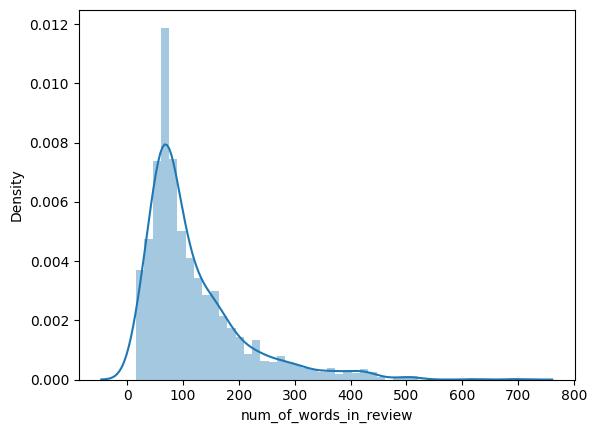

In [54]:
sns.distplot(positive['num_of_words_in_review'])

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_26392\811058803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative['num_of_words_in_review'])


<Axes: xlabel='num_of_words_in_review', ylabel='Density'>

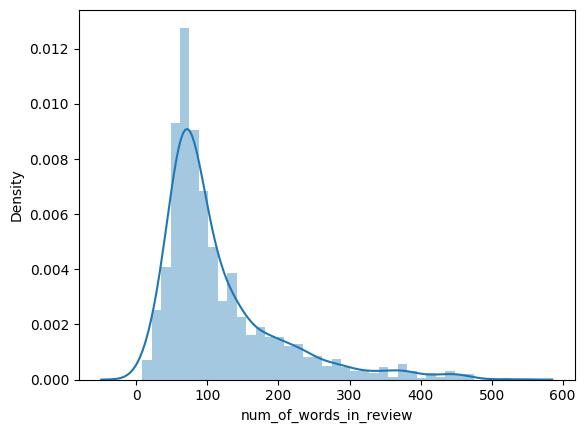

In [55]:
sns.distplot(negative['num_of_words_in_review'])

#### `Since both are almost identical we cannot use the num_of_words_in_review feature to decide if a review has positive sentiment or negative sentiment.`

#### `Now let us see for review_length`

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_26392\3600799371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive['review_length'])


<Axes: xlabel='review_length', ylabel='Density'>

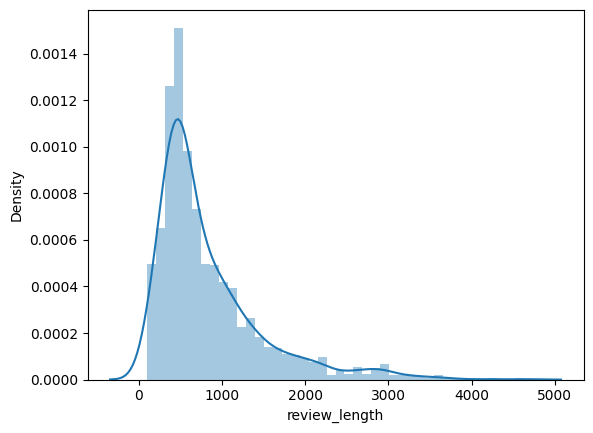

In [56]:
sns.distplot(positive['review_length'])

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_26392\2237721148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative['review_length'])


<Axes: xlabel='review_length', ylabel='Density'>

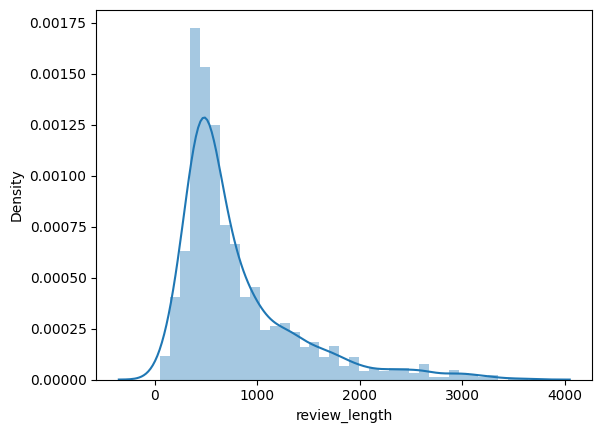

In [57]:
sns.distplot(negative['review_length'])

#### `These graphs also look almost identical. Hence this feature is also not useful.`

# `ngrams`

In [58]:
from nltk import ngrams

In [59]:
list(ngrams(['My', 'name', 'is', 'Abhishek'], 2))

[('My', 'name'), ('name', 'is'), ('is', 'Abhishek')]

In [60]:
df['tokenized_review']

0       [one, reviews, mentioned, watching, 1, oz, epi...
1       [wonderful, little, production, filling, techn...
2       [thought, wonderful, way, spend, time, hot, su...
3       [basically, family, little, boy, jake, thinks,...
4       [letter, matters, love, time, money, usually, ...
                              ...                        
2995    [experience, head, really, need, understand, m...
2996    [I, fan, judy, grand, vincent, minnelli, gene,...
2997    [mr, harvey, lights, candle, anchor, brilliant...
2998    [well, eyes, singer, upperclass, housewife, li...
2999    [hired, movie, expecting, laughs, hopefully, e...
Name: tokenized_review, Length: 3000, dtype: object

In [61]:
df['tokenized_review'].sum()

['one',
 'reviews',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutally',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punched',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardware',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'onward',
 'maximum',
 'security',
 'state',
 'penitentiary',
 'focused',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyorgans',
 'muslin',
 'gangstas',
 'nations',
 'christians',
 'italians',
 'irish',
 'moreso',
 'snuffles',
 'death',
 'stares',
 'podgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

### `Let us see bigrams of all the reviews.`

In [62]:
bigram_freq = pd.Series(ngrams(df['tokenized_review'].sum(), 2)).value_counts()
bigram_freq

(I, would)              151
(ever, seen)            130
(I, seen)               128
(special, effects)      124
(even, though)          120
                       ... 
(afterwards, viewer)      1
(viewer, asked)           1
(asked, tough)            1
(tough, question)         1
(wanting, waste)          1
Name: count, Length: 281949, dtype: int64

# `wordcloud`

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

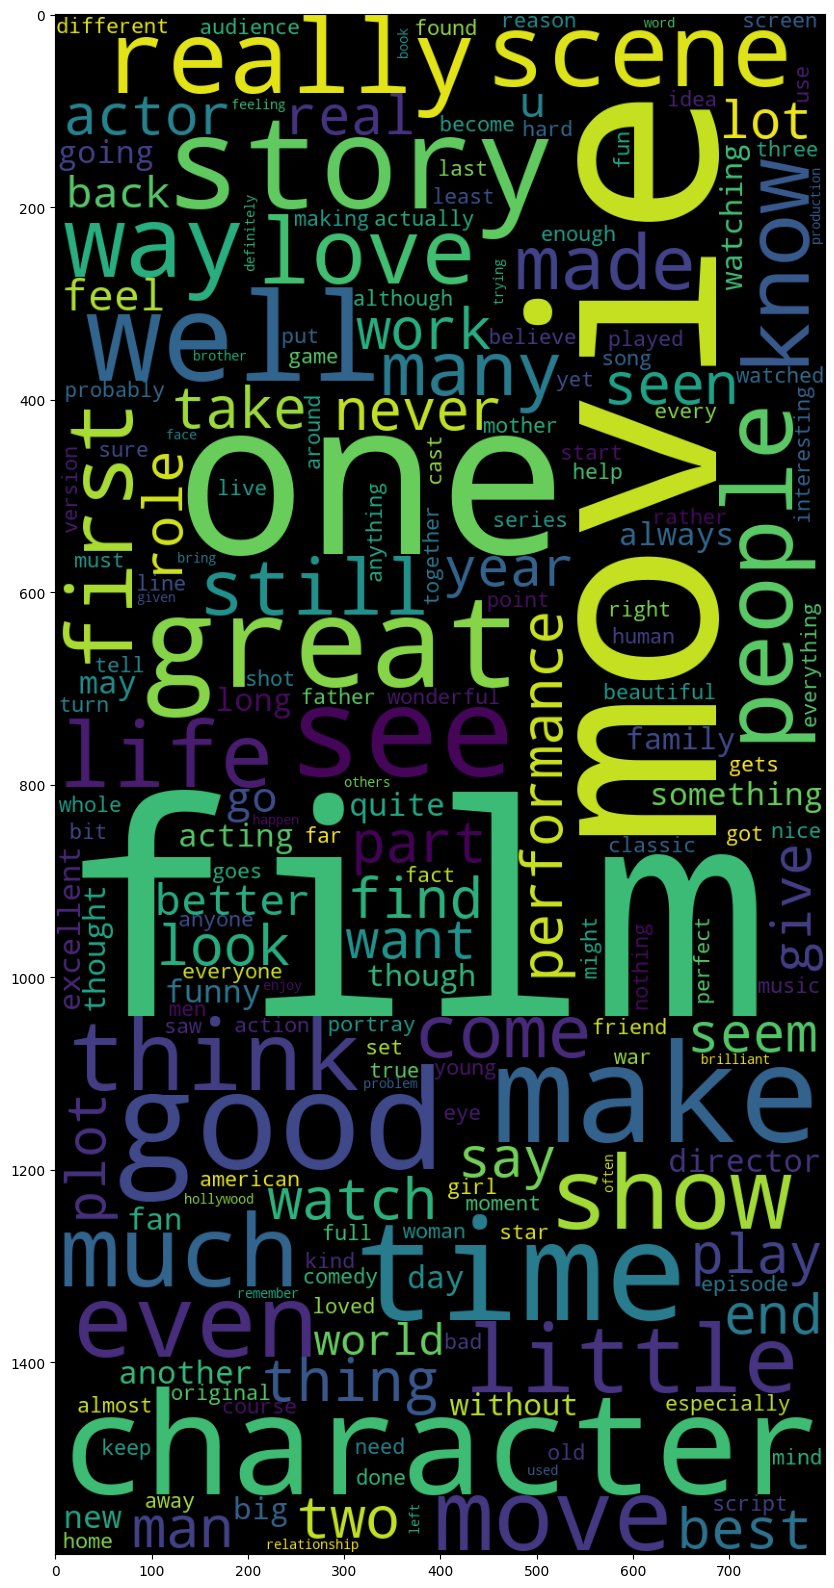

In [64]:
plt.figure(figsize = (20, 20))
positive_wc = WordCloud(height = 1600, width = 800).generate(" ".join(positive['review']))
plt.imshow(positive_wc)

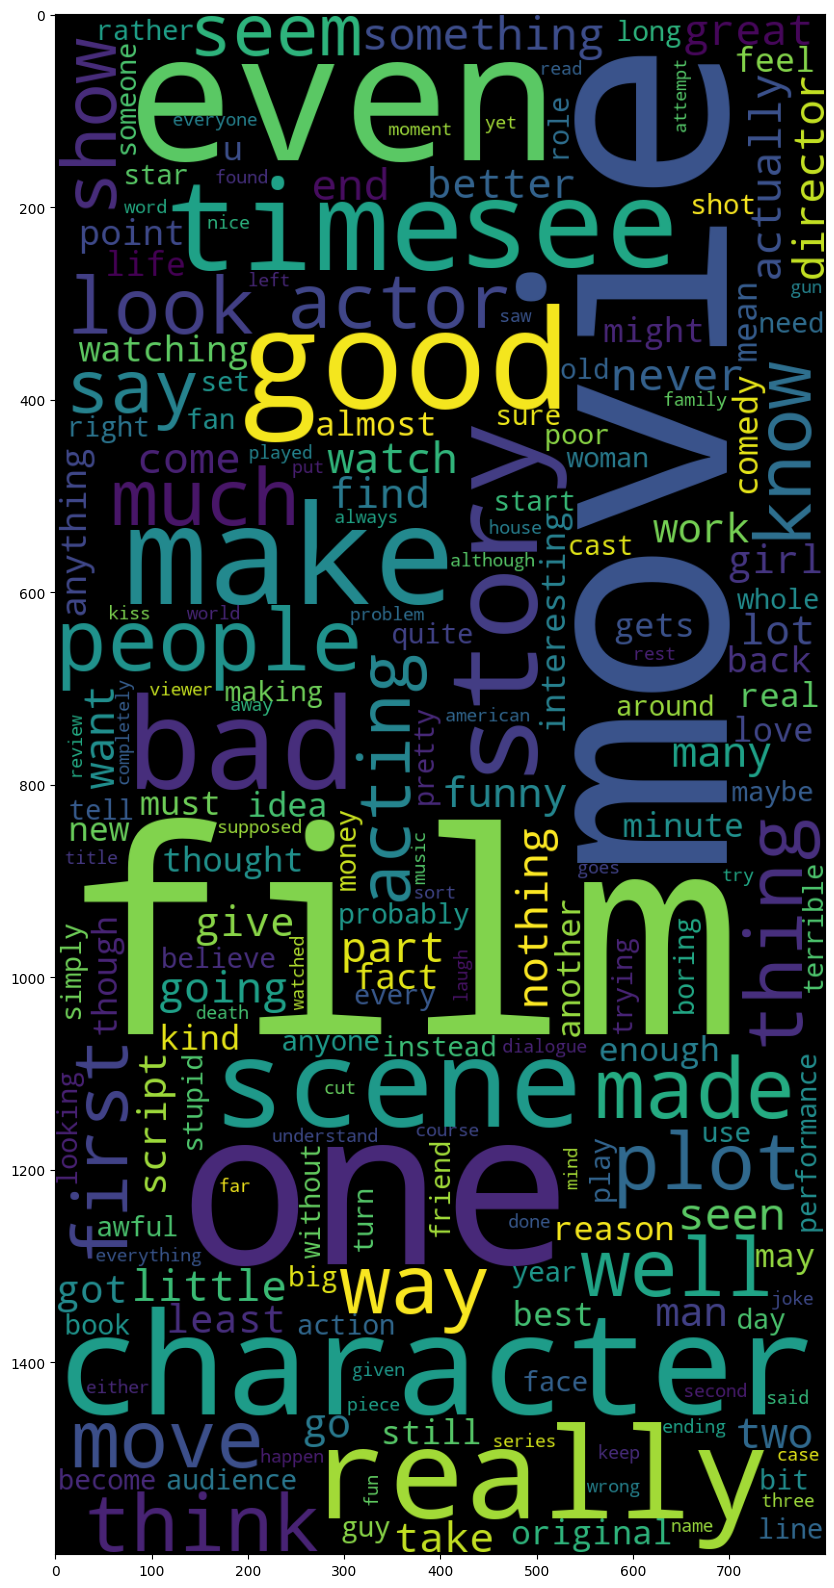

In [65]:
plt.figure(figsize = (20, 20))
negative_wc = WordCloud(height = 1600, width = 800).generate(" ".join(negative['review']))
plt.imshow(negative_wc)

# `Vectorization`

    The vectorization is the process of converting the textual data into numeric data which can then be used 
    by machine learning model (since machine learning models work on numbers and not textual data)
    
    We have various techniques by which we do vectorization.
    
    One of the techniques is Bag Of Words(BOW) technique.

# `Bag Of Words(BOW)`

    The bag of words method takes in a series and counts the frequency of each and every word and creates a dictionary.
    
    The CountVectorizer then takes the number of max_features. If max_features = 5, then it will take the top 5 words
    with maximum frequency. It then takes each and every value of the series and converts it into a vector.
    
    The vector stores the frequency of words in the value which are present in the CountVectorizer.
    
    
    Suppose count_vectorizer = CountVectorizer(max_features = 10)
    
    Then suppose we pass in a series S which has w1, w2, ..., w1000 as words by which its values has been created.
    
    Then, count_vectorizer will fing only top 10 highest frequency words. Let us suppose they are w1, w2, ..., w10.
    
    It will now convert each value of series in the form of a vector which will store the frequencies of w1, w2, ..., w10
    in the value.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
count_vectorizer = CountVectorizer(max_features = 5000) # This will make a list of top 5000 highest frequency words found inside the value of a series.
bag_of_words = count_vectorizer.fit_transform(df['review'])

In [79]:
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns = count_vectorizer.get_feature_names_out())

In [80]:
bag_of_words

,10,100,1010,11,110,12,13,14,15,16,...,yes,yesterday,yet,york,you,young,younger,youth,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
